# Efficient Frontier

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [2]:
%reload_ext autoreload

In [3]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [4]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [5]:
import numpy as np
weights = np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [6]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

## 2 Asset Frontier

In [7]:
l = ["Games", "Fin"]

In [8]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0,1,n_points)]

In [9]:
weights = [np.array([w, 1-w]) for w in np.linspace(0,1,n_points)]

In [10]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

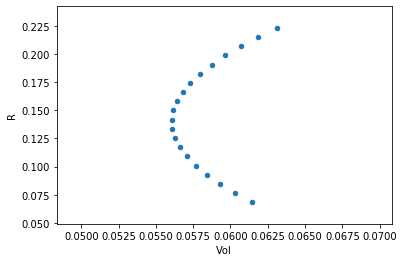

In [11]:
import pandas as pd
# Create a list of returns and volalities for all the weights
rets = [erk.portfolio_return(w, er[l]) for w in weights] 
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R":rets, "Vol":vols})
ef.plot.scatter(x="Vol", y="R")

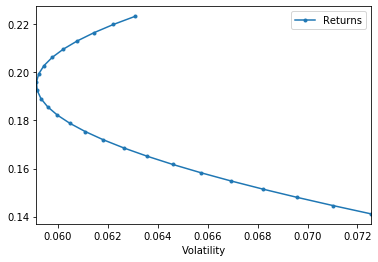

In [12]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l])

# N-Asset Efficient Frontier

In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python
def plot_ef(n_points, er, cov):
    """
    Plots the n-asset efficient frontier
    """
    weights = minimize_vol(target_return)????
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
            "Returns": rets,
            "Volatility": vols
        })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

```

In [14]:
# Quadratic optimizer


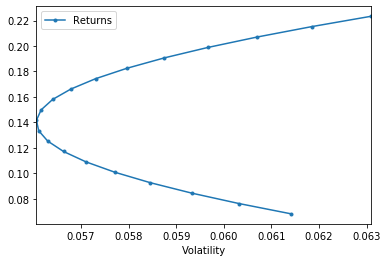

In [15]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [16]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [17]:
from scipy.optimize import minimize

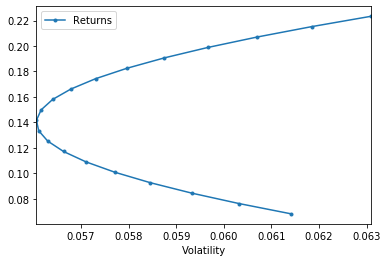

In [18]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [19]:
def minimize_vol(target_return, er, cov):
    """
    target_ret -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n #Tupple of tupple repited n times
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weigths: np.sum(weights) - 1 #should be equale to zero
    }
    results = minimize(erk.portfolio_vol, init_guess, 
                       args=(cov,), method="SLSQP",
                      constraints=(return_is_target, weights_sum_to_1),
                      bounds=bounds
                      )
    return results.x

In [20]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [21]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimiter on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    """
    Plots the n-asset efficient frontier
    """
    weights = erk.optimal_weights(n_points, er, cov)
    print(weights)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
            "Returns": rets,
            "Volatility": vols
        })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

[array([6.24121414e-12, 0.00000000e+00, 1.00000000e+00, 1.69135539e-17]), array([2.82558541e-01, 3.77488116e-04, 7.07876266e-01, 9.18770439e-03]), array([0.27459505, 0.06550565, 0.63730009, 0.02259922]), array([0.26454234, 0.12491864, 0.57173002, 0.038809  ]), array([0.25544391, 0.18491584, 0.50499221, 0.05464804]), array([0.24434725, 0.25412834, 0.43493564, 0.06658877]), array([0.23775853, 0.30516899, 0.37092071, 0.08615177]), array([0.22889874, 0.36533453, 0.30387859, 0.10188814]), array([0.22011104, 0.42534717, 0.23685706, 0.11768473]), array([0.20800597, 0.48559521, 0.17264357, 0.13375525]), array([0.20414829, 0.5418226 , 0.10334589, 0.15068322]), array([0.19331722, 0.6053109 , 0.03621488, 0.165157  ]), array([1.66832213e-01, 6.37917578e-01, 4.33680869e-18, 1.95250209e-01]), array([1.19574973e-01, 6.38255904e-01, 3.46944695e-18, 2.42169122e-01]), array([7.29013642e-02, 6.37658133e-01, 2.12503626e-17, 2.89440502e-01]), array([2.58620743e-02, 6.37646886e-01, 8.34835673e-17, 3.3649104

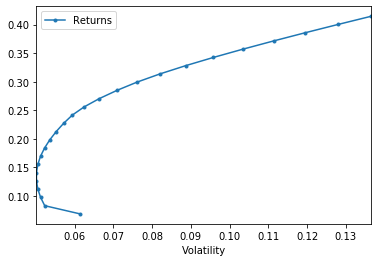

In [22]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25, er[l], cov.loc[l,l])